In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract


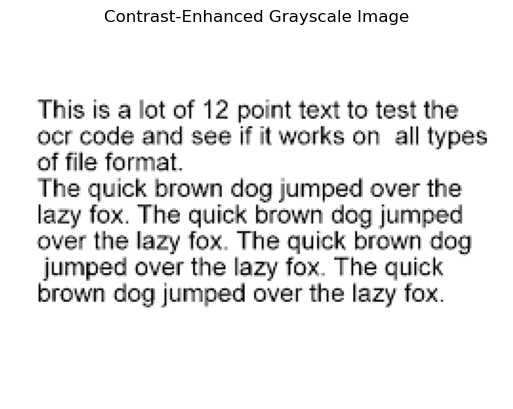

In [99]:
# Path to your printed text image
image_path = r"D:\TESSERACT\project\images.png"

# Load image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("❌ Error: Could not load image. Check path or format.")

# Convert to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Auto-resize for processing speed (if large)
h, w = gray.shape
if w > 1200:
    scale = 1200 / w
    gray = cv2.resize(gray, None, fx=scale, fy=scale)
    print(f"✅ Image resized (scale={scale:.2f})")

# CLAHE contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

plt.imshow(enhanced, cmap='gray')
plt.title("Contrast-Enhanced Grayscale Image")
plt.axis("off")
plt.show()


📊 Mean intensity: 234.04, Std Dev: 59.70
✅ Image is clean. Skipping noise reduction.


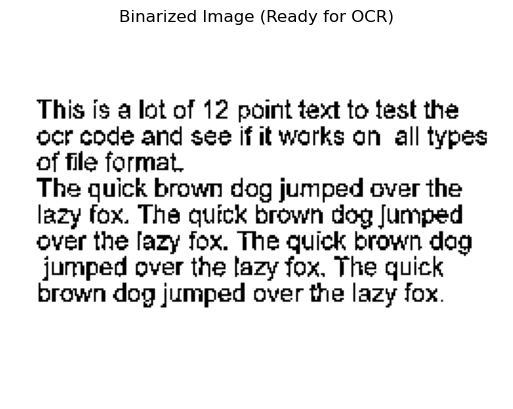

In [100]:
# Detect noise level automatically
mean_intensity = np.mean(enhanced)
std_intensity = np.std(enhanced)

print(f"📊 Mean intensity: {mean_intensity:.2f}, Std Dev: {std_intensity:.2f}")

# If high noise (large std), apply light denoise
if std_intensity > 60:
    enhanced = cv2.fastNlMeansDenoising(enhanced, None, 15, 7, 21)
    print("🧼 Light noise reduction applied.")
else:
    print("✅ Image is clean. Skipping noise reduction.")

# Adaptive thresholding for consistent binarization
binary = cv2.adaptiveThreshold(
    enhanced, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    15, 10
)

plt.imshow(binary, cmap='gray')
plt.title("Binarized Image (Ready for OCR)")
plt.axis("off")
plt.show()


✅ Text brightness good. No sharpening needed.


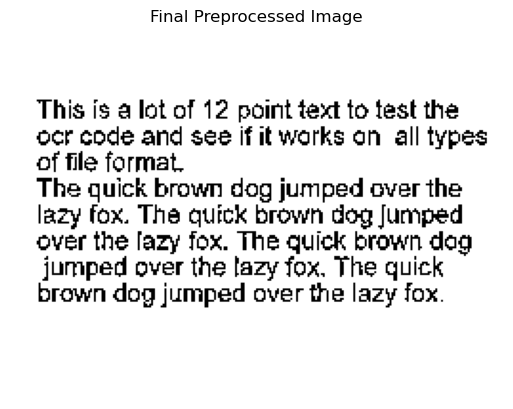

In [101]:
# Sharpen edges only if text seems faded (detected from mean intensity)
if mean_intensity < 110:
    sharp_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    binary = cv2.filter2D(binary, -1, sharp_kernel)
    print("✨ Sharpening applied for faded text.")
else:
    print("✅ Text brightness good. No sharpening needed.")

plt.imshow(binary, cmap='gray')
plt.title("Final Preprocessed Image")
plt.axis("off")
plt.show()


In [102]:
# OCR configuration
custom_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(binary, config=custom_config)

print("🧾 Extracted Text:\n")
print(extracted_text.strip())


🧾 Extracted Text:

This is a lot of 12 point text to test the
‘ocr code and see ifit works on all types
of file format.

‘The quick brown dog jumped over the
lazy fox. The quick brown dog Jumped
‘over the lazy fox. The quick brown dog
jumped over the lazy fox, The quick
brown dog jumped over the lazy fox


In [103]:
cv2.imwrite("smart_preprocessed.png", binary)
with open("ocr_output.txt", "w", encoding="utf-8") as f:
    f.write(extracted_text.strip())

print("✅ Saved preprocessed image and OCR text file.")


✅ Saved preprocessed image and OCR text file.


✅ Image loaded successfully!


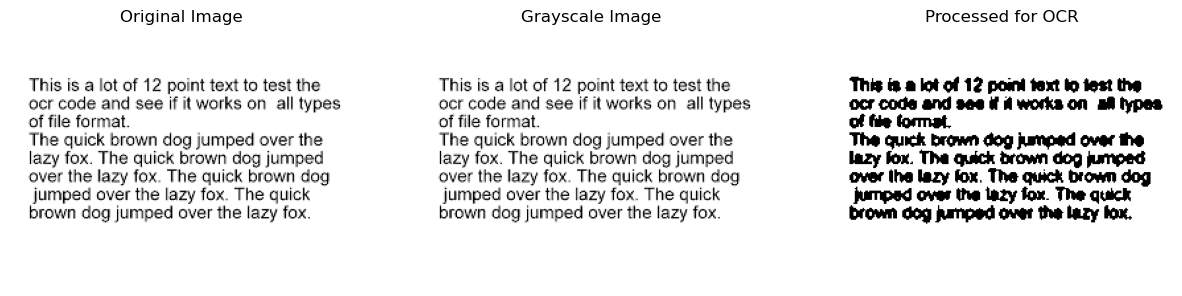

💾 Preprocessed image saved to: D:\TESSERACT\project\processed_image.png


In [104]:
# --- OCR Preprocessing (Optimized for Printed Text) ---

import cv2
import os
from matplotlib import pyplot as plt

# 🔹 Step 1: Set your image path
image_path = r"D:\TESSERACT\project\images.png"   # <-- Change this to your file

# 🔹 Step 2: Check if file exists
if not os.path.exists(image_path):
    print("⚠️ File not found! Check the path again.")
else:
    # Load image
    image = cv2.imread(image_path)

    if image is None:
        print("⚠️ cv2 could not read the file. Check file type/extension.")
    else:
        print("✅ Image loaded successfully!")

        # --- Step 3: Convert to grayscale ---
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # --- Step 4: Resize if too large (for faster OCR) ---
        max_width, max_height = 1200, 800
        h, w = gray.shape
        if w > max_width or h > max_height:
            scale = min(max_width / w, max_height / h)
            gray = cv2.resize(gray, (int(w * scale), int(h * scale)))
            print(f"📏 Image resized to {gray.shape[1]}x{gray.shape[0]}")

        # --- Step 5: Apply light denoising & thresholding ---
        # Use Gaussian Blur (small kernel) for mild noise removal
        blur = cv2.GaussianBlur(gray, (3, 3), 0)

        # Adaptive threshold keeps edges sharp and readable
        thresh = cv2.adaptiveThreshold(
            blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 35, 11
        )

        # --- Step 6: Visualize results ---
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(gray, cmap="gray")
        plt.title("Grayscale Image")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(thresh, cmap="gray")
        plt.title("Processed for OCR")
        plt.axis("off")

        plt.show()

        # --- Step 7: Save preprocessed image (optional) ---
        processed_path = r"D:\TESSERACT\project\processed_image.png"
        cv2.imwrite(processed_path, thresh)
        print(f"💾 Preprocessed image saved to: {processed_path}")


In [105]:
import pytesseract
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(enhanced, config=custom_config)
print(text)


This is a lot of 12 point text to test the
ocr code and see if it works on all types
of fle format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox



In [106]:
# --- OCR Text Extraction using pytesseract ---

import pytesseract
from PIL import Image
import cv2
import os

# 🔹 Step 1: Tesseract installation path (update this for your system)
# Example for Windows:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# 🔹 Step 2: Load preprocessed image
processed_path = r"D:\TESSERACT\project\processed_image.png"  # from previous part

if not os.path.exists(processed_path):
    print("⚠️ Processed image not found! Please run Part 3 first.")
else:
    image = cv2.imread(processed_path)

    # 🔹 Step 3: Run OCR with advanced configuration
    custom_config = r'--oem 3 --psm 6'  
    # oem 3 → LSTM + legacy engine (best accuracy)
    # psm 6 → assume a uniform block of text

    extracted_text = pytesseract.image_to_string(image, config=custom_config)

    # 🔹 Step 4: Print the extracted text
    print("🧾 Extracted Text:\n")
    print(extracted_text.strip())

    # 🔹 Step 5: Optionally save to text file
    output_text_path = r"D:\TESSERACT\project\extracted_text.txt"
    with open(output_text_path, "w", encoding="utf-8") as f:
        f.write(extracted_text.strip())

    print(f"\n💾 Extracted text saved to: {output_text_path}")


🧾 Extracted Text:

‘This é2.a lot of 12 poind toxt to test the
cr code and see id works on all types,
of tie format

‘The quick brown dog kanped over the
lazy fox. Tha quick brown dog jumped
‘ver the lazy fox. The quick brown dog
Jumped over the lazy fox. The quick
brown dog jumped over the lazy fox,

💾 Extracted text saved to: D:\TESSERACT\project\extracted_text.txt


In [107]:
# --- OCR Text Correction and Cleanup ---

from textblob import TextBlob

# Load your extracted text (from Part 4)
with open(r"D:\TESSERACT\project\extracted_text.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print("🔍 Raw OCR Output:\n")
print(raw_text)

# 🔹 Step 1: Clean extra newlines & special characters
cleaned_text = raw_text.replace('\n', ' ').replace('‘', "'").replace('’', "'").replace('“', '"').replace('”', '"')
cleaned_text = ' '.join(cleaned_text.split())  # remove extra spaces

# 🔹 Step 2: Apply AI-based correction
blob = TextBlob(cleaned_text)
corrected_text = str(blob.correct())

print("\n✨ Corrected Text:\n")
print(corrected_text)

# 🔹 Step 3: Save corrected text
output_corrected_path = r"D:\TESSERACT\project\corrected_text.txt"
with open(output_corrected_path, "w", encoding="utf-8") as f:
    f.write(corrected_text)

print(f"\n💾 Corrected text saved to: {output_corrected_path}")


ModuleNotFoundError: No module named 'textblob'

In [108]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/624.3 kB 653.6 kB/s eta 0:00:01
   -------------------------- ------------- 419.8/624.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 8.9 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.5 MB 6.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
